# Create Graph Plots of the Vector Images

In [64]:
from itertools import groupby
from operator import itemgetter
from matplotlib import pyplot as plt
import os

plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 150

colors = {
    "TURQOI":"CYAN",
    "":"WHITE",
}

def scvec(old_x,old_y,color,x,y,i=0):
    c = "BLACK" if i == 0 else colors.get(color,color)
    vec=(x-old_x,y-old_y,c)
    old_x = x
    old_y = y
    return (vec,old_x,old_y)

def calvec(old_x,old_y,x,y):
    vec=(x-old_x,y-old_y,"WHITE")
    old_x = x
    old_y = y
    return (vec,old_x,old_y)

def vctr(x,y,i):
    x,y=int(x,16),int(y,16)
    if i == "0":
        return (x,y,"BLACK")
    return (x,y,"WHITE")

def parse_calvec_parms(parms):
    x,y = [x.replace('.','') for x in parms[0].split(',')]
    x = 0x00 if x == "NXE" else int(x,16)
    y = int(y,16)
    return (x,y)

def parse_vector_commands(vector_data,default_color="red"):
    color = ""
    vecs = []
    old_x,old_y = 0,0
    for l in vector_data.splitlines()[2:]:
        tokens = l.strip().split()
        cmd, parms = tokens[0],tokens[1:]
        if cmd in ["ICVEC","ICALVE"]:
            vecs+=[(0,0,"BLACK")]
            old_x,old_y=0,0
        elif cmd == "CNTR":
            vecs+=[(0,0,"BLACK")]
        elif cmd == "CSTAT":
            color = parms[0]
        elif cmd == "VCTR":
            parms = parms[0].split(',')
            vecs+=[vctr(*parms)]
        elif cmd == "VEC":
            # A 0,0 origin is implicit.
            if len(vecs) == 0:
                vecs+=[(0,0,default_color)]    
            parms = [int(x,16) for x in parms[0].split(',')]
            x,y = parms[:2]
            vecs+=[(x,y,default_color)]
        elif cmd == "SCVEC":
            parms = [int(x,16) for x in parms[0].split(',')]
            vec,old_x,old_y = scvec(old_x,old_y,color,*parms)
            vecs+=[vec]
        elif cmd == "CALVEC":
            x,y = parse_calvec_parms(parms)
            vec,old_x,old_y = calvec(old_x,old_y,x,y)
            vecs+=[vec]
    return vecs

def vectors_to_coords(vectors):
    xs,ys,cs=[],[],[]
    px,py,pc=0,0,None
    for x,y,c in vectors:
        # If we're changing color, add a vertex with the
        # new color at the old position.
        if pc and c != pc:
            xs+=[px]
            ys+=[py]
            cs+=[c]
        # Calculate the position of the new vertex
        px+=x
        py+=y
        xs+=[px]
        ys+=[py]
        cs+=[c]
        pc=c
    return list(zip(xs,ys,cs))

def plot_vertices(verts):
    _, ax = plt.subplots()
    last_x,last_y=[],[]
    for k,g in groupby(verts, key=itemgetter(2)):
        l = list(g)
        xs,ys,_ =zip(*l)
        # Don't paint the vectors marked as black, 
        # we're just moving the beam.
        alpha = 0 if k == "BLACK" else 1
        ax.plot(xs,ys,'-',color=k,alpha=alpha)


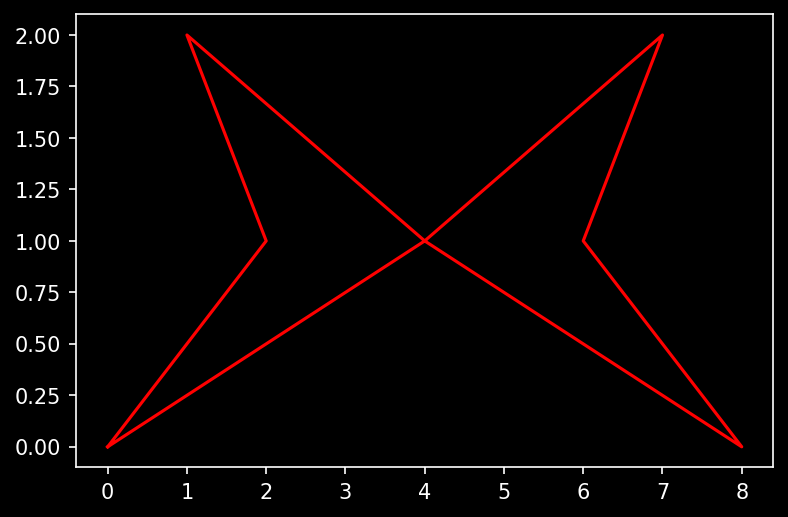

In [65]:
vector_data = """
INVA1S:
	VEC 4,1,1
	VEC 4,-1,1
	VEC -2,1
	VEC 1,1
	VEC -3,-1
	VEC -3,1
	VEC 1,-1
	VEC -2,-1
"""
vectors = parse_vector_commands(vector_data,default_color="red")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


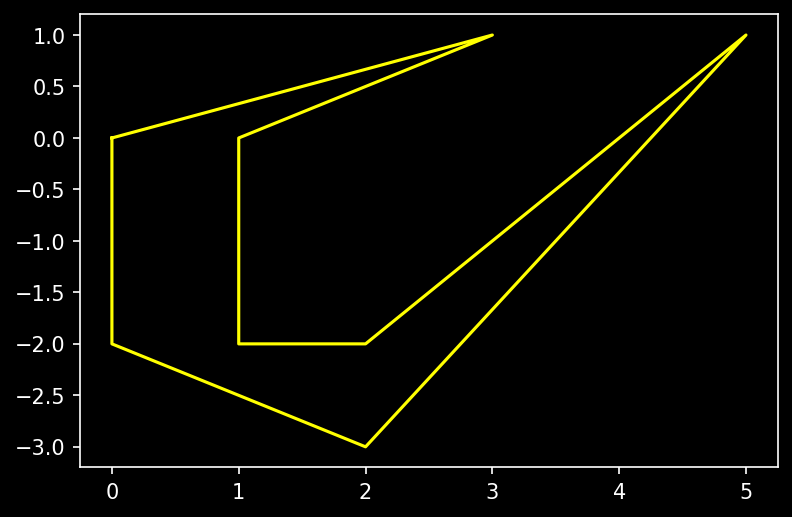

In [66]:
vector_data = """
NCRS1S:
	VEC 0,-2
	VEC 2,-1
	VEC 3,4
	VEC -3,-3
	VEC -1,0
	VEC 0,2
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


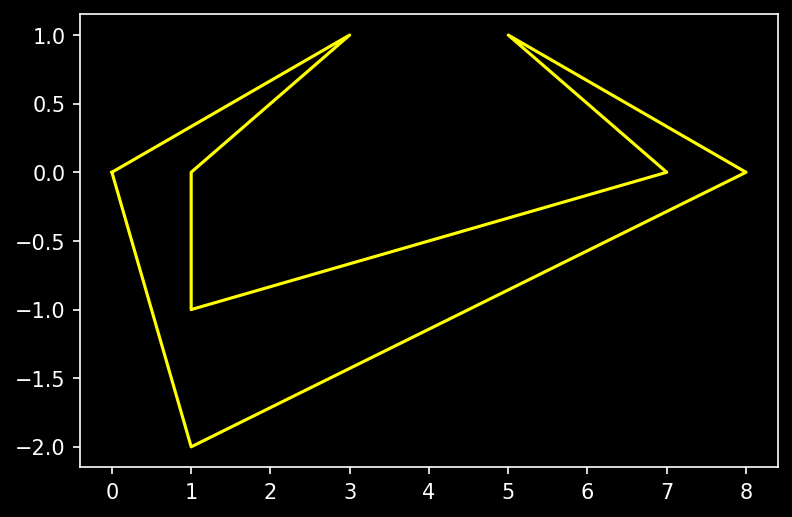

In [67]:
vector_data = """
NCRS2S:
	VEC 1,-2
	VEC 7,2
	VEC -3,1
	VEC 2,-1
	VEC -6,-1
	VEC 0,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


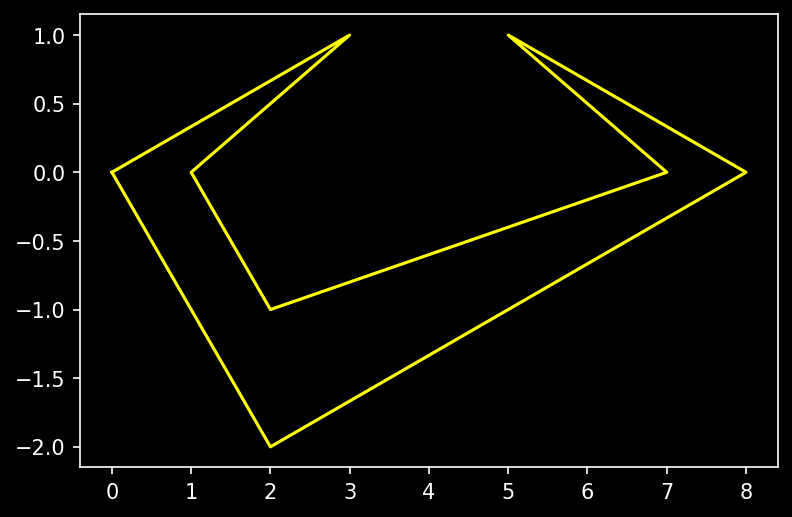

In [68]:
vector_data = """
NCRS3S:
	VEC 2,-2
	VEC 6,2
	VEC -3,1
	VEC 2,-1
	VEC -5,-1
	VEC -1,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


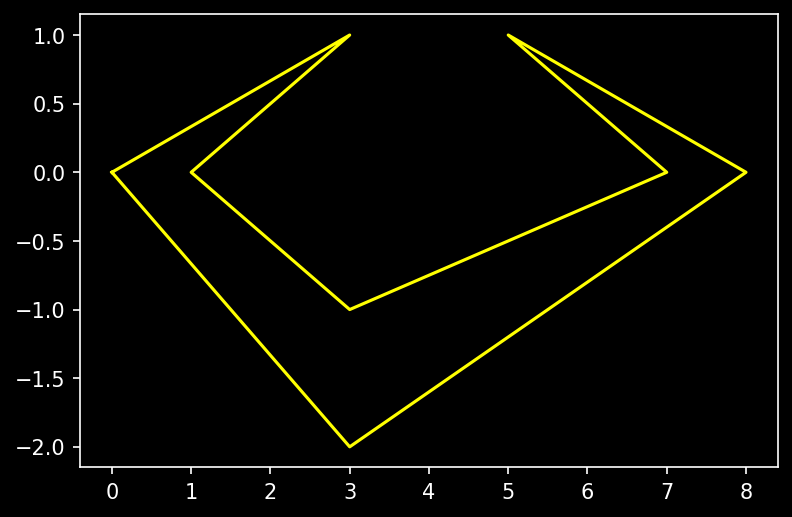

In [69]:
vector_data = """
NCRS4S:
	VEC 3,-2
	VEC 5,2
	VEC -3,1
	VEC 2,-1
	VEC -4,-1
	VEC -2,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


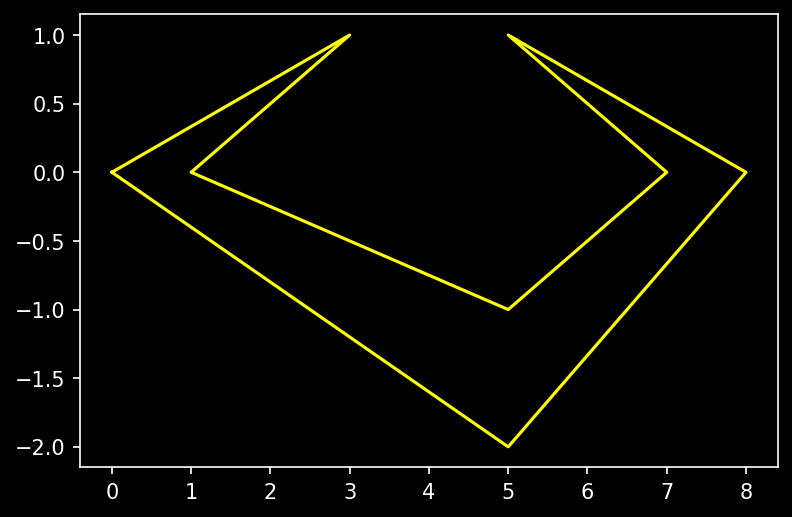

In [70]:
vector_data = """
NCRS5S:
	VEC 5,-2
	VEC 3,2
	VEC -3,1
	VEC 2,-1
	VEC -2,-1
	VEC -4,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


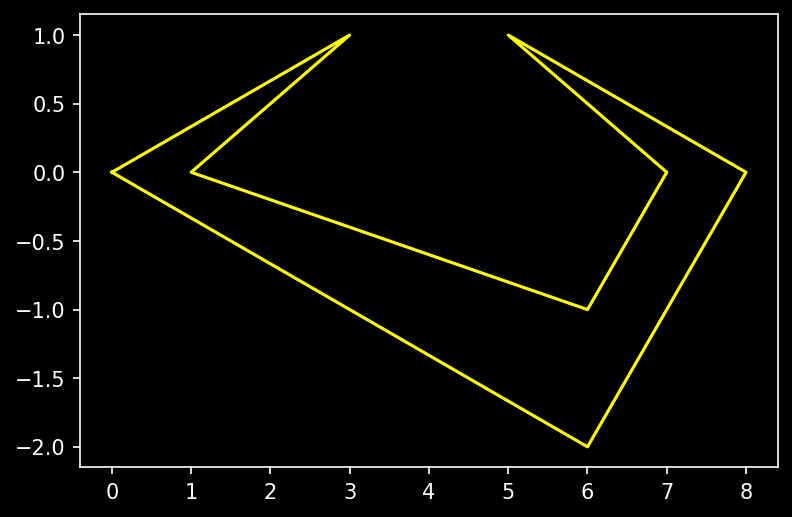

In [71]:
vector_data = """
NCRS6S:
	VEC 6,-2
	VEC 2,2
	VEC -3,1
	VEC 2,-1
	VEC -1,-1
	VEC -5,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


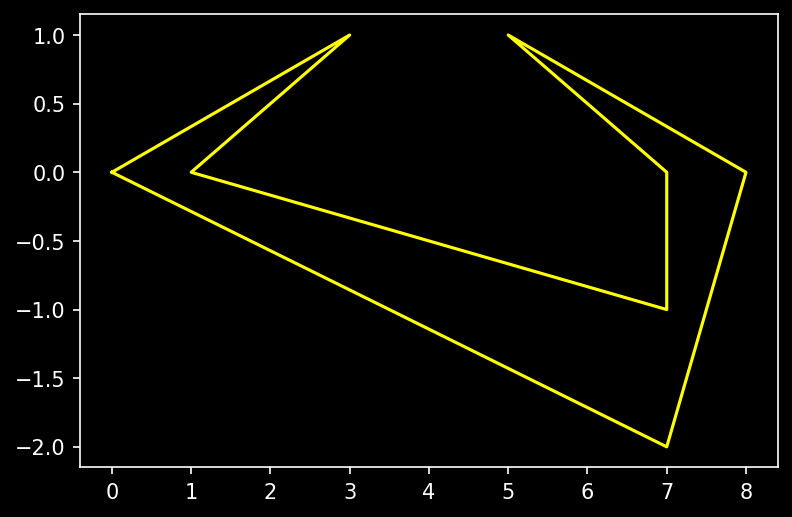

In [72]:
vector_data = """
NCRS7S:
	VEC 7,-2
	VEC 1,2
	VEC -3,1
	VEC 2,-1
	VEC 0,-1
	VEC -6,1
	VEC 2,1
	VEC -3,-1
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


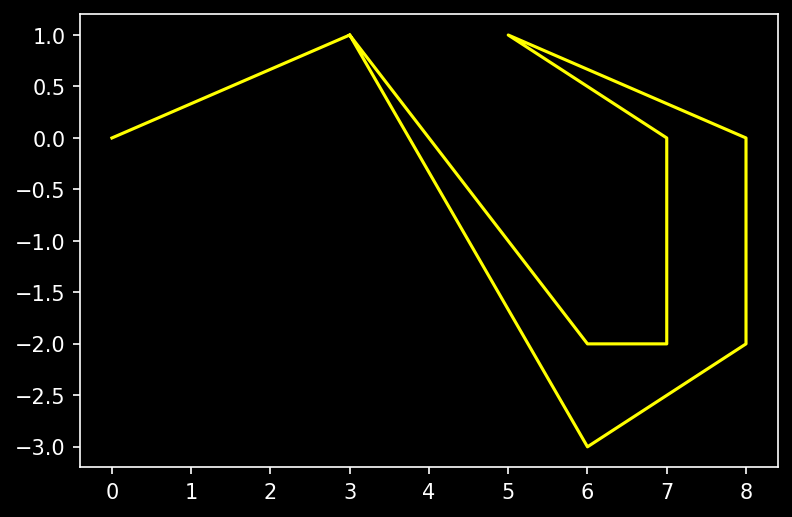

In [73]:
vector_data = """
NCRS8S:
	VEC 3,1,0
	VEC 3,-4
	VEC 2,1
	VEC 0,2
	VEC -3,1
	VEC 2,-1
	VEC 0,-2
	VEC -1,0
	VEC -3,3
"""
vectors = parse_vector_commands(vector_data,default_color="yellow")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


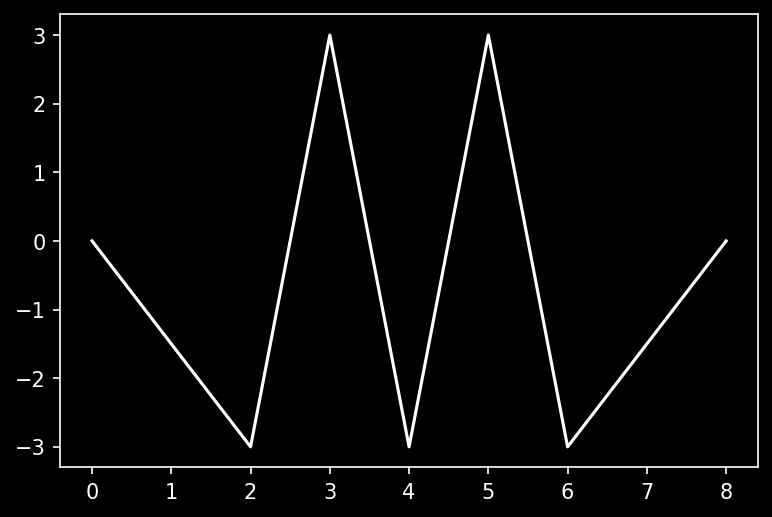

In [74]:
vector_data = """
PULS4S:
	VEC 2,-3
	VEC 1,6
	VEC 1,-6
	VEC 1,6
	VEC 1,-6
	VEC 2,3
"""
vectors = parse_vector_commands(vector_data,default_color="white")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


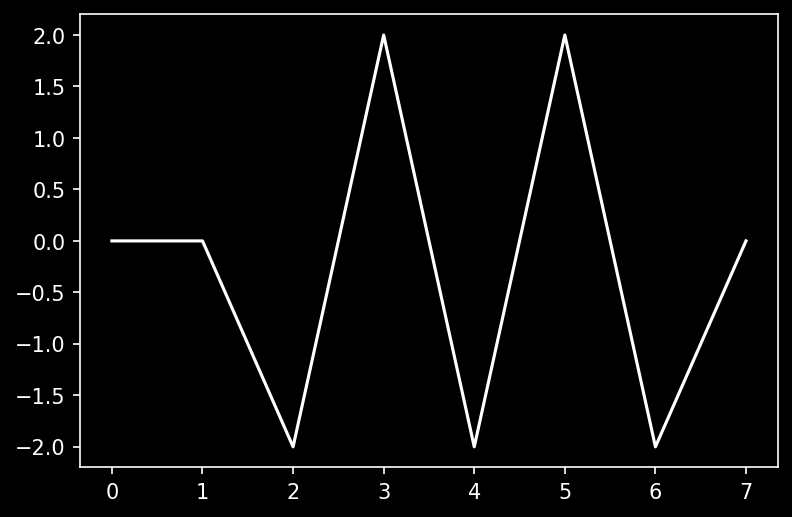

In [75]:
vector_data = """
PULS3S:
	VEC 1,0,0
	VEC 1,-2
	VEC 1,4
	VEC 1,-4
	VEC 1,4
	VEC 1,-4
	VEC 1,2
"""
vectors = parse_vector_commands(vector_data,default_color="white")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


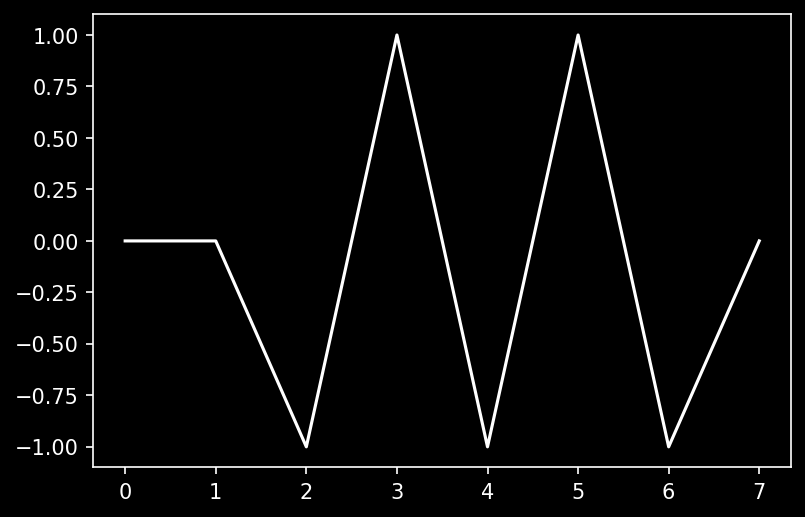

In [76]:
vector_data = """
PULS2S:
	VEC 1,0,0
	VEC 1,-1
	VEC 1,2
	VEC 1,-2
	VEC 1,2
	VEC 1,-2
	VEC 1,1
"""
vectors = parse_vector_commands(vector_data,default_color="white")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


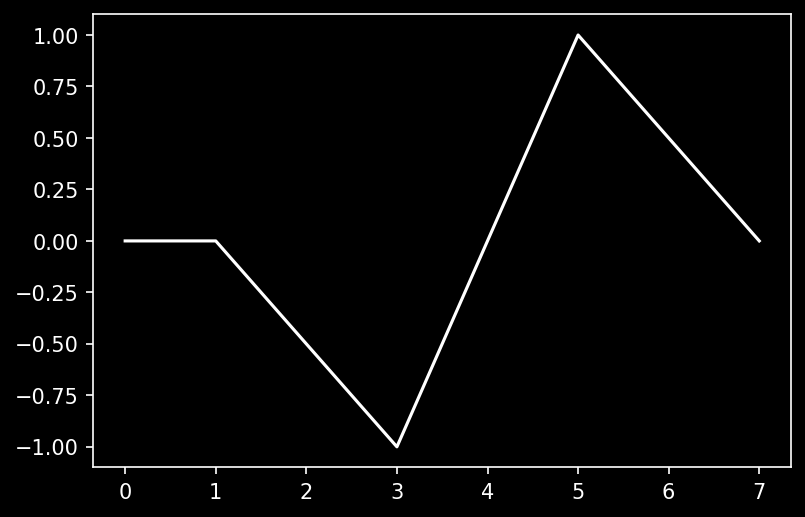

In [77]:
vector_data = """
PULS1S:
	VEC 1,0,0
	VEC 2,-1
	VEC 2,2
	VEC 2,-1
"""
vectors = parse_vector_commands(vector_data,default_color="white")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


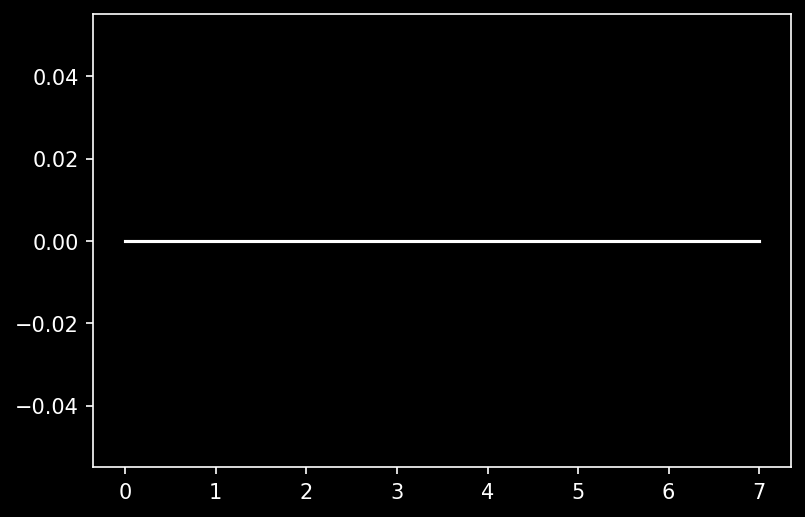

In [78]:
vector_data = """
PULS0S:	
    VEC 1,0,0
	VEC 6,0
"""
vectors = parse_vector_commands(vector_data,default_color="white")
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


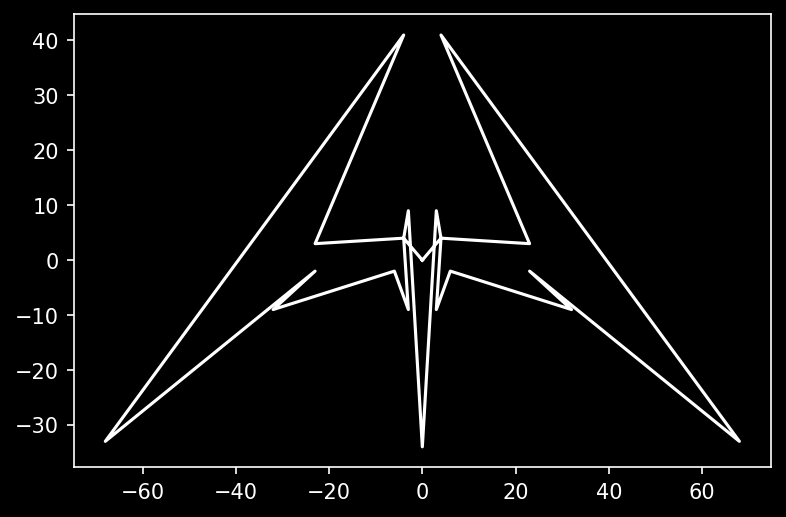

In [79]:
vector_data = """
ENER11:
	ICALVE
	CALVEC -4,4
	.BRITE=VARBRT
	CALVEC -17.,3
	CALVEC -4,29.
	CALVEC -44.,-21.
	CALVEC -17.,-2
	CALVEC -20.,-9
	CALVEC -6,-2
	CALVEC -3,-9
	CALVEC -4,4
	CALVEC -3,9
	CALVEC 0,-22.
	CALVEC 3,9
	CALVEC 4,4
	CALVEC 3,-9
	CALVEC 6,-2
	CALVEC 20.,-9
	CALVEC 17.,-2
	CALVEC 44.,-21.
	CALVEC 4,29.
	CALVEC 17.,3
	CALVEC 4,4
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


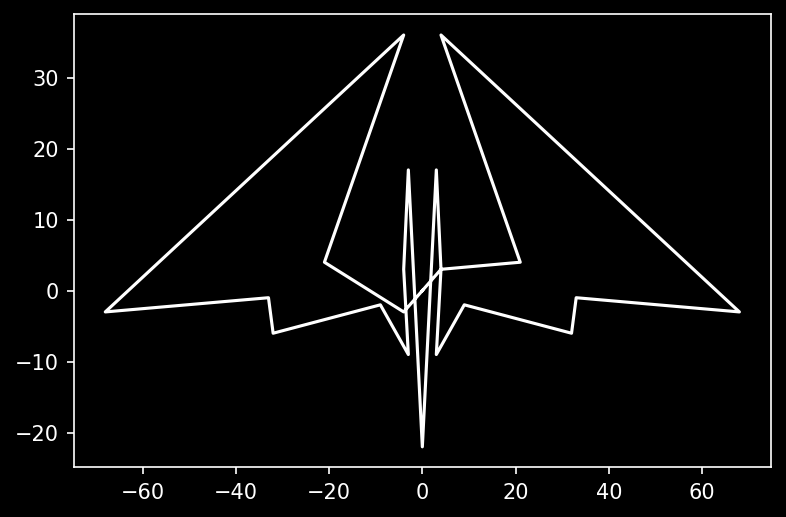

In [80]:
vector_data = """
ENER12:
	ICALVE
	CALVEC -4,-3
	.BRITE=VARBRT
	CALVEC -15.,4
	CALVEC -4,24.
	CALVEC -44.,-3
	CALVEC -21.,-1
	CALVEC -20.,-6
	CALVEC -9,-2
	CALVEC -3,-9
	CALVEC -4,3
	CALVEC -3,11.
	CALVEC 0,-16.
	CALVEC 3,11.
	CALVEC 4,3
	CALVEC 3,-9
	CALVEC 9,-2
	CALVEC 20.,-6
	CALVEC 21.,-1
	CALVEC 44.,-3
	CALVEC 4,24.
	CALVEC 15.,4
	CALVEC 4,3
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


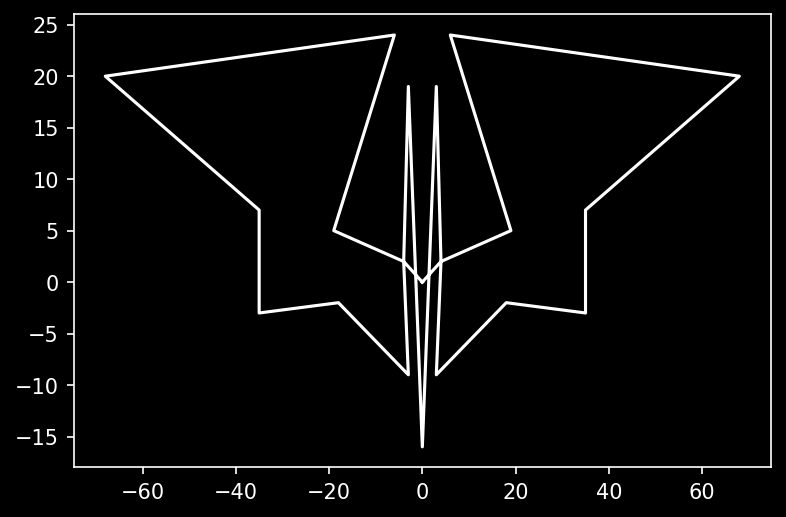

In [81]:
vector_data = """
ENER13:
	ICALVE
	CALVEC -4,2
	.BRITE=VARBRT
	CALVEC -13.,5
	CALVEC -6,18.
	CALVEC -44.,14.
	CALVEC -23.,7.
	CALVEC -23.,-3
	CALVEC -12.,-2
	CALVEC -3,-9
	CALVEC -4,2
	CALVEC -3,13.
	CALVEC 0,-10.
	CALVEC 3,13.
	CALVEC 4,2
	CALVEC 3,-9
	CALVEC 12.,-2
	CALVEC 23.,-3
	CALVEC 23.,7
	CALVEC 44.,14.
	CALVEC 6,18.
	CALVEC 13.,5
	CALVEC 4,2
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


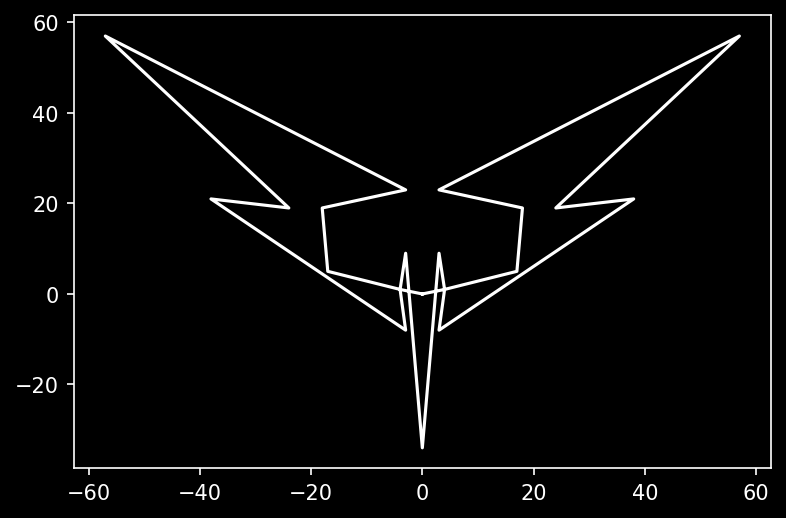

In [82]:
vector_data = """
ENER14:
	ICALVE
	CALVEC -4,1
	.BRITE=VARBRT
	CALVEC -11.,5
	CALVEC -12.,13.
	CALVEC -3,17.
	CALVEC -39.,39.
	CALVEC -18.,13.
	CALVEC -26.,15.
	CALVEC -3,-8
	CALVEC -4,1
	CALVEC -3,9
	CALVEC 0,-22.
	CALVEC 3,9
	CALVEC 4,1
	CALVEC 3,-8
	CALVEC 26.,15.
	CALVEC 18.,13.
	CALVEC 39.,39.
	CALVEC 3,17.
	CALVEC 12.,13.
	CALVEC 11.,5
	CALVEC 4,1
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


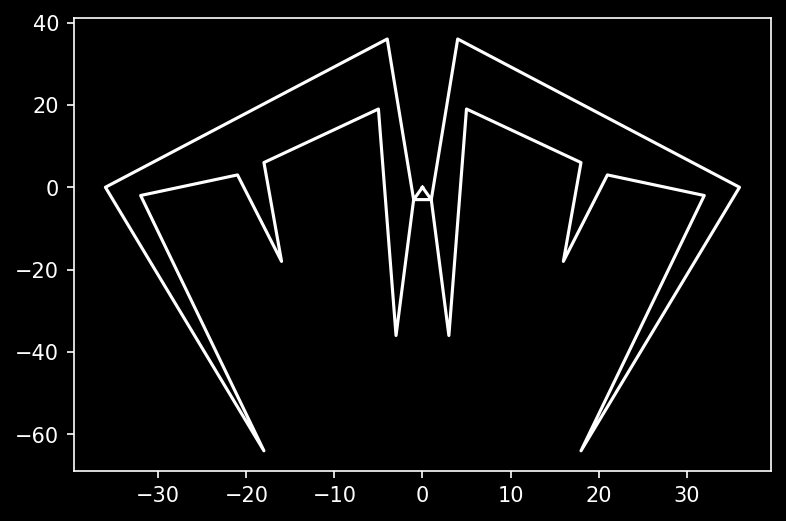

In [83]:
vector_data = """
ENER21:
	ICALVE
	CALVEC -1,-3
	.BRITE=VARBRT
	CALVEC -4,24.
	CALVEC -24.,0
	CALVEC -12.,-40.
	CALVEC -20.,-2
	CALVEC -15.,3
	CALVEC -10.,-12.
	CALVEC -12.,6
	CALVEC -5,13.
	CALVEC -3,-24.
	CALVEC -1,-3
	.BRITE=0
	CALVEC 1,-3
	.BRITE=VARBRT
	CALVEC 3,-24.
	CALVEC 5,13.
	CALVEC 12.,6
	CALVEC 10.,-12.
	CALVEC 15.,3
	CALVEC 20.,-2
	CALVEC 12.,-40.
	CALVEC 24.,0
	CALVEC 4,24.
	CALVEC 1,-3
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


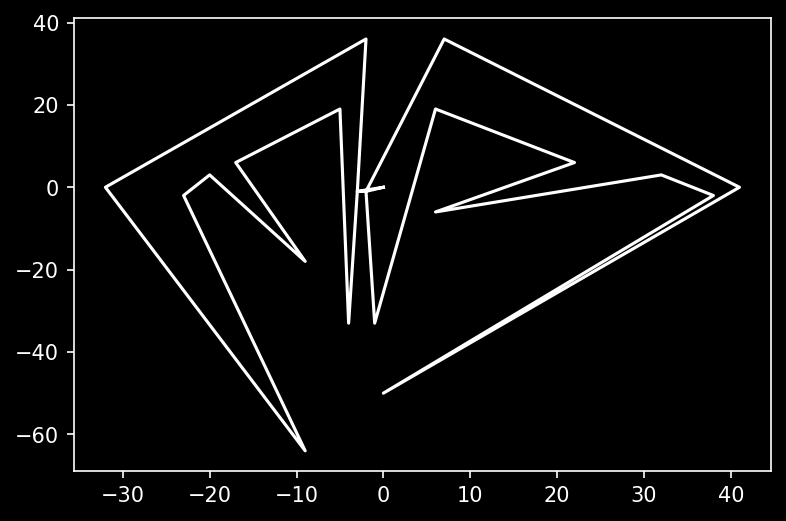

In [84]:
vector_data = """
ENER22:
	ICALVE
	CALVEC -3,-1
	.BRITE=VARBRT
	CALVEC -2,24.
	CALVEC -20.,0
	CALVEC -9,-40.
	CALVEC -17.,-2
	CALVEC -14.,3
	CALVEC -9,-12.
	CALVEC -11.,6
	CALVEC -5,13.
	CALVEC -4,-21.
	CALVEC -3,-1
	.BRITE=0
	CALVEC -2,-1
	.BRITE=VARBRT
	CALVEC 7,24.
	CALVEC 29.,0
	CALVEC 0,-32.
	CALVEC 26.,-2
	CALVEC 20.,3
	CALVEC 6,-6
	CALVEC 16.,6
	CALVEC 6,13.
	CALVEC -1,-21.
	CALVEC -2,-1
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


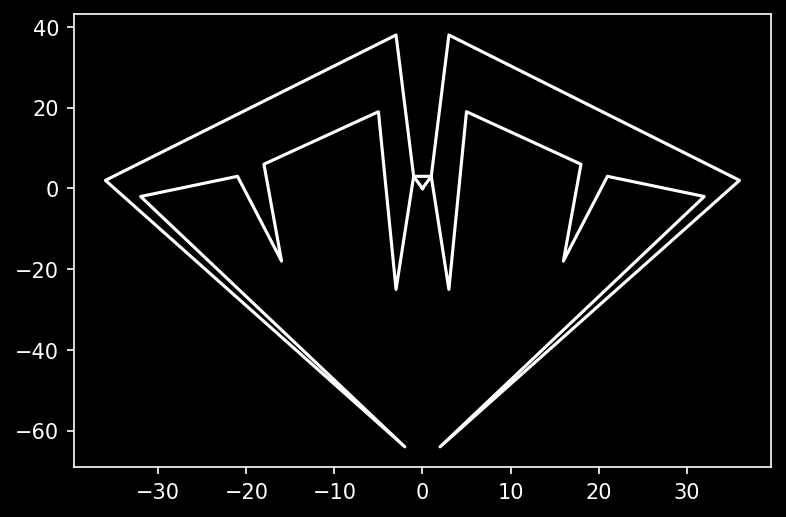

In [85]:
vector_data = """
ENER23:
    ICALVE
	CALVEC -1,3
	.BRITE=VARBRT
	CALVEC -3,26.
	CALVEC -24.,2
	CALVEC -2,-40.
	CALVEC -20.,-2
	CALVEC -15.,3
	CALVEC -10.,-12.
	CALVEC -12.,6
	CALVEC -5,13.
	CALVEC -3,-19.
	CALVEC -1,3
	.BRITE=0
	CALVEC 1,3
	.BRITE=VARBRT
	CALVEC 3,-19.
	CALVEC 5,13.
	CALVEC 12.,6
	CALVEC 10.,-12.
	CALVEC 15.,3
	CALVEC 20.,-2
	CALVEC 2,-40.
	CALVEC 24.,2
	CALVEC 3,26.
	CALVEC 1,3
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


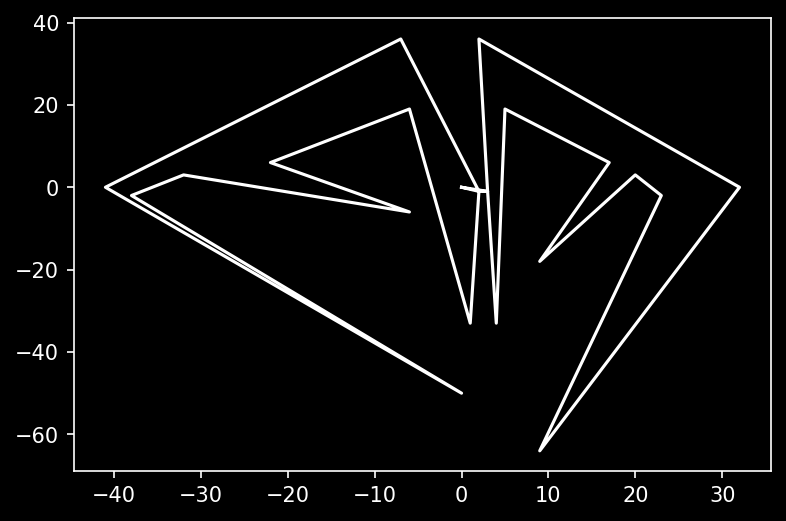

In [86]:
vector_data = """
ENER24:
	ICALVE
	CALVEC 2,-1
	.BRITE=VARBRT
	CALVEC -7,24.
	CALVEC -29.,0
	CALVEC 0,-32.
	CALVEC -26.,-2
	CALVEC -20.,3
	CALVEC -6,-6
	CALVEC -16.,6
	CALVEC -6,13.
	CALVEC 1,-21.
	CALVEC 2,-1
	.BRITE=0
	CALVEC 3,-1
	.BRITE=VARBRT
	CALVEC 2,24.
	CALVEC 20.,0
	CALVEC 9,-40.
	CALVEC 17.,-2
	CALVEC 14.,3
	CALVEC 9,-12.
	CALVEC 11.,6
	CALVEC 5,13.
	CALVEC 4,-21.
	CALVEC 3,-1
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


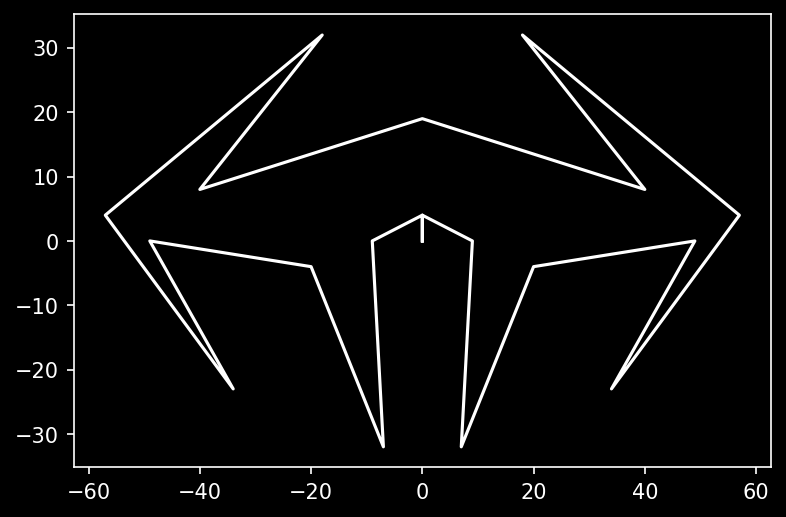

In [87]:
vector_data = """
ENER41:
	ICALVE
	CALVEC 0,4
	.BRITE=VARBRT
	CALVEC -9,0
	CALVEC -7,-20.
	CALVEC -14.,-4
	CALVEC -31.,0
	CALVEC -22.,-17.
	CALVEC -39.,4
	CALVEC -12.,20.
	CALVEC -28.,8
	CALVEC 0,13.
	CALVEC 28.,8
	CALVEC 12.,20.
	CALVEC 39.,4
	CALVEC 22.,-17.
	CALVEC 31.,0
	CALVEC 14.,-4
	CALVEC 7,-20.
	CALVEC 9,0
	CALVEC 0,4
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


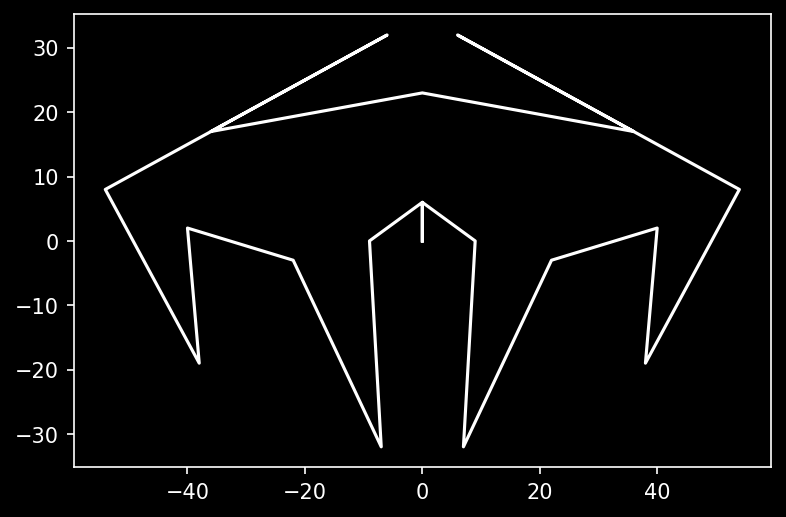

In [88]:
vector_data = """
ENER42:
	ICALVE
	CALVEC 0,6
	.BRITE=VARBRT
	CALVEC -9,0
	CALVEC -7,-20.
	CALVEC -16.,-3
	CALVEC -28.,2
	CALVEC -26.,-13.
	CALVEC -36.,8
	CALVEC -6,20.
	CALVEC -24.,11.
	CALVEC 0,17.
	CALVEC 24.,11.
	CALVEC 6,20.
	CALVEC 36.,8
	CALVEC 26.,-13.
	CALVEC 28.,2
	CALVEC 16.,-3
	CALVEC 7,-20.
	CALVEC 9,0
	CALVEC 0,6
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


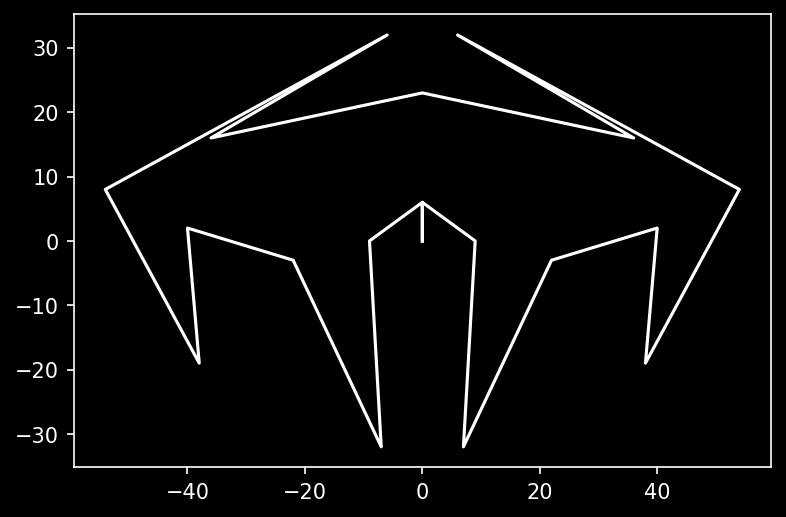

In [89]:
vector_data = """
ENER43:
	ICALVE
	CALVEC 0,6
	.BRITE=VARBRT
	CALVEC -9,0
	CALVEC -7,-20.
	CALVEC -16.,-3.
	CALVEC -28.,2
	CALVEC -26.,-13.
	CALVEC -36.,8
	CALVEC -6,20.
	CALVEC -24.,10.
	CALVEC 0,17.
	CALVEC 24.,10.
	CALVEC 6,20.
	CALVEC 36.,8
	CALVEC 26.,-13.
	CALVEC 28.,2
	CALVEC 16.,-3
	CALVEC 7,-20.
	CALVEC 9,0
	CALVEC 0,6
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


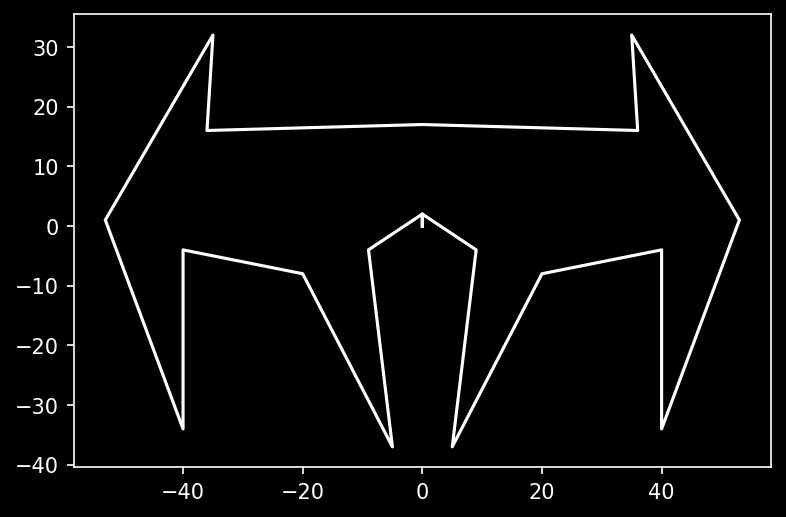

In [90]:
vector_data = """
ENER44:
	ICALVE
	CALVEC 0,2
	.BRITE=VARBRT
	CALVEC -9,-4
	CALVEC -5,-25.
	CALVEC -14.,-8
	CALVEC -28.,-4
	CALVEC -28.,-22.
	CALVEC -35.,1
	CALVEC -23.,20.
	CALVEC -24.,10.
	CALVEC 0,11.
	CALVEC 24.,10.
	CALVEC 23.,20.
	CALVEC 35.,1
	CALVEC 28.,-22.
	CALVEC 28.,-4
	CALVEC 14.,-8
	CALVEC 5,-25.
	CALVEC 9,-4
	CALVEC 0,2
	.BRITE=0
	CALVEC NXE,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


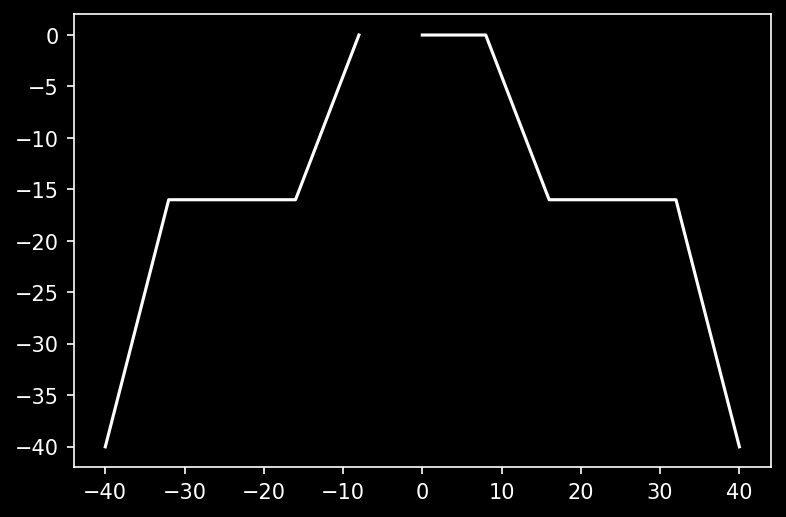

In [91]:
vector_data = """
GUNPIC:
    VCTR -8,0,6
	VCTR -8,-10,6
	VCTR -10,0,6
	VCTR -8,-18,6
	VCTR 50,0,0
	VCTR -8,18,6
	VCTR -10,0,6
	VCTR -8,10,6
	VCTR -8,0,6
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


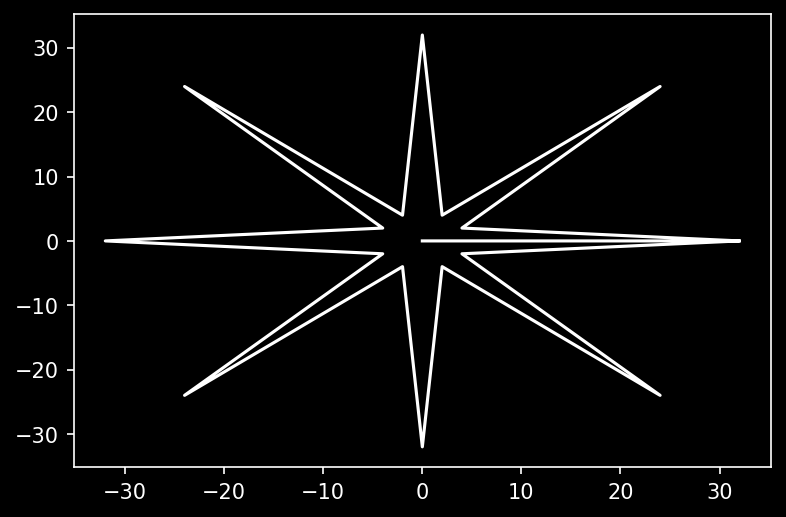

In [92]:
vector_data = """
EXPLOP:
	ICALVE
	.BRITE=0
	CALVEC 20.,0
	.BRITE=VARBRT
	CALVEC 4,2
	CALVEC 18.,18.
	CALVEC 2,4
	CALVEC 0,20.
	CALVEC -2,4
	CALVEC -18.,18.
	CALVEC -4,2
	CALVEC -20.,0
	CALVEC -4,-2
	CALVEC -18.,-18.
	CALVEC -2,-4
	CALVEC 0,-20.
	CALVEC 2,-4
	CALVEC 18.,-18.
	CALVEC 4,-2
	CALVEC 20.,0
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


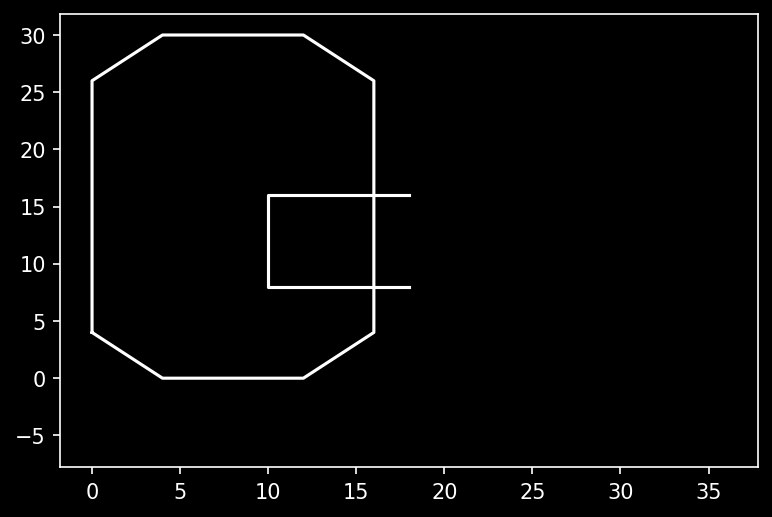

In [93]:
vector_data = """
COPYR:
	VCTR 0,4,0
	VCTR 0,16,.BRITE
	VCTR 4,4,.BRITE
	VCTR 8,0,.BRITE
	VCTR 4,-4,.BRITE
	VCTR 0,-16,.BRITE
	VCTR -4,-4,.BRITE
	VCTR -8,0,.BRITE
	VCTR -4,4,.BRITE
	VCTR 12,4,0
	VCTR -8,0,.BRITE
	VCTR 0,8,.BRITE
	VCTR 8,0,.BRITE
	VCTR 12,-16,0
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)

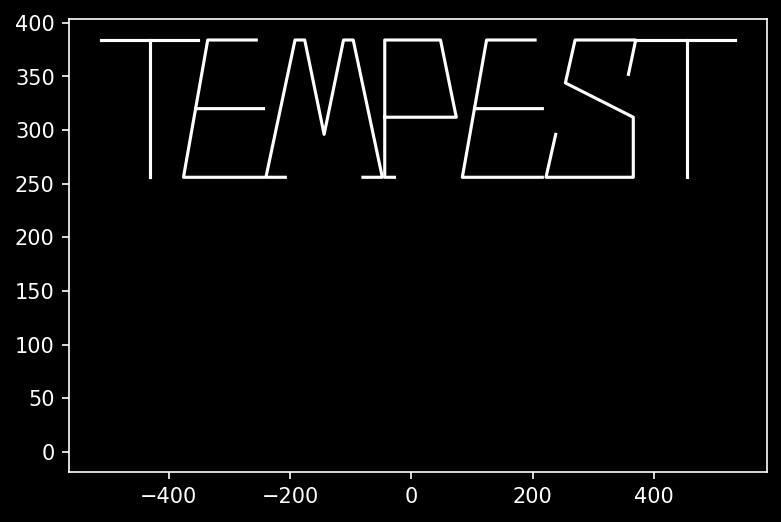

In [94]:
vector_data = """
TEMLIT:
	CNTR
	VCTR -1B0,100,0
T:	
    VCTR 0,80,CB		;T
	VCTR -50,0,0
	VCTR 0A0,0,CB
	RTSL
	VCTR 60,0,0
E:	
    VCTR -50,0,CB		;E
	VCTR -14,-40,CB
	VCTR 70,0,CB
	VCTR -70,0,0
	VCTR -14,-40,CB
	VCTR 84,0,CB
	RTSL
	VCTR 24,0,0
M:	
    VCTR -20,0,CB		;M
	VCTR 30,80,CB
	VCTR 10,0,CB
	VCTR 20,-58,CB
	VCTR 20,58,CB
	VCTR 10,0,CB
	VCTR 30,-80,CB
	VCTR -20,0,CB
	RTSL
	VCTR 34,0,0
P:	
    VCTR -10,0,CB		;P
	VCTR 0,80,CB
	VCTR 5C,0,CB
	VCTR 1A,-48,CB
	VCTR -76,0,CB
	RTSL
	VCTR 0F8,48,0
E:	
    VCTR -50,0,CB		;E
	VCTR -14,-40,CB
	VCTR 70,0,CB
	VCTR -70,0,0
	VCTR -14,-40,CB
	VCTR 84,0,CB
	RTSL
	VCTR 16,28,0
S:	
    VCTR -10,-28,CB		;S
	VCTR 90,0,CB
	VCTR 0,38,CB
	VCTR -70,20,CB
	VCTR 10,28,CB
	VCTR 64,0,CB
	VCTR -0C,-20,CB
	RTSL
	VCTR 60,-60,0
T:	
    VCTR 0,80,CB		;T
	VCTR -50,0,0
	VCTR 0A0,0,CB
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


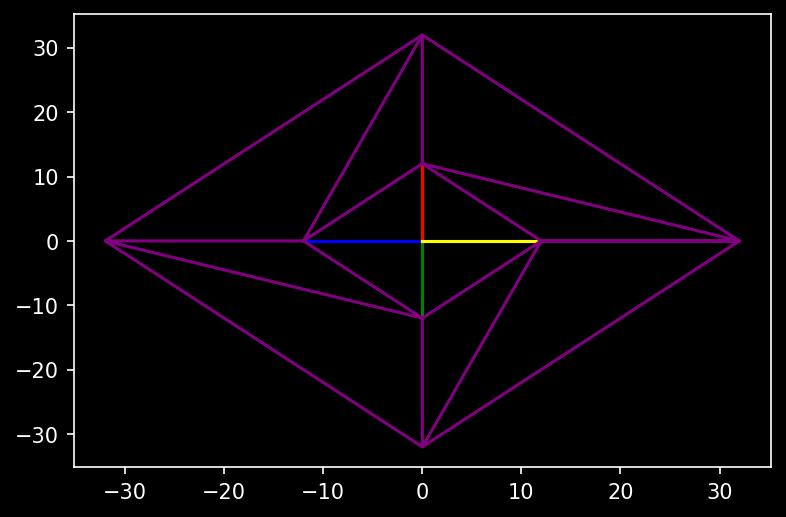

In [95]:
vector_data = """
TANKF:				;TANKER OF FUSES
	ICVEC
	CSTAT BLUE
	SCVEC -0C,0,CB
	SCVEC 0,0C,0
	CSTAT RED
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 0,-0C,CB
	SCVEC 0,0,0
	CSTAT YELLOW
	SCVEC 0C,0,CB
	SCVEC 20,0,0
GENTNK:	
    CSTAT PURPLE
	SCVEC 0,20,CB
	SCVEC 0,0C,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	SCVEC 0,0C,CB
	SCVEC -0C,0,CB
	SCVEC 0,20,CB
	SCVEC -20,0,CB
	SCVEC -0C,0,CB
	SCVEC 0,-0C,CB
	SCVEC -20,0,CB
	SCVEC 0,-20,CB
	SCVEC 0,-0C,CB
	SCVEC 0C,0,CB
	SCVEC 0,-20,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


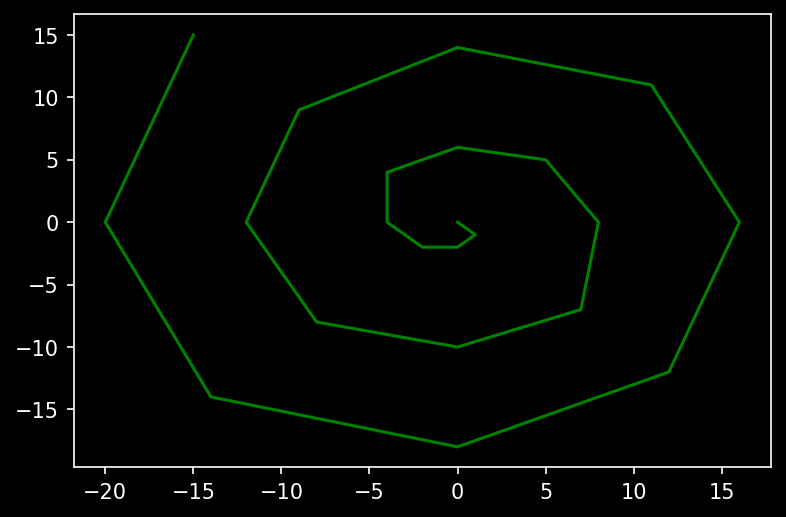

In [96]:
vector_data = """
SPIRA1:
	CSTAT GREEN
	ICVEC
	SCVEC 1,-1,CB
	SCVEC 0,-2,CB
	SCVEC -2,-2,CB
	SCVEC -4,0,CB
	SCVEC -4,4,CB
	SCVEC 0,6,CB
	SCVEC 5,5,CB
	SCVEC 8,0,CB
	SCVEC 7,-7,CB
	SCVEC 0,-0A,CB
	SCVEC -8,-8,CB
	SCVEC -0C,0,CB
	SCVEC -9,9,CB
	SCVEC 0,0E,CB
	SCVEC 0B,0B,CB
	SCVEC 10,0,CB
	SCVEC 0C,-0C,CB
	SCVEC 0,-12,CB
	SCVEC -0E,-0E,CB
	SCVEC -14,0,CB
	SCVEC -0F,0F,CB
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


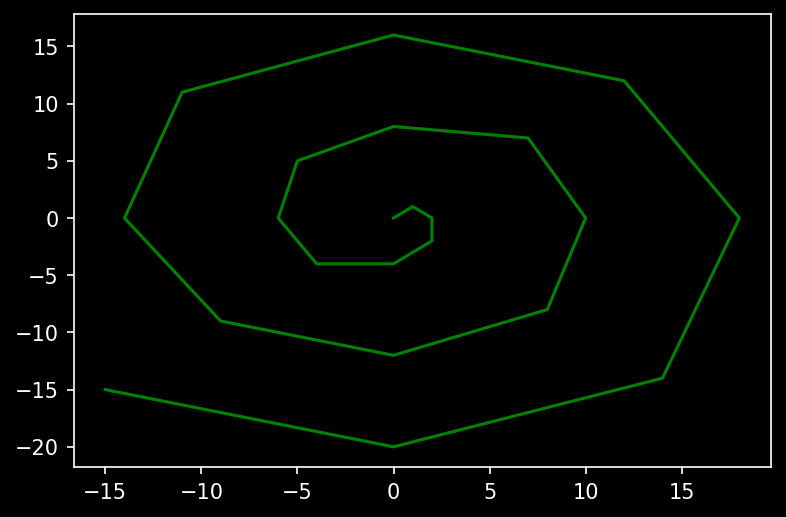

In [97]:
vector_data = """
SPIRA2:
	CSTAT GREEN
	ICVEC
	SCVEC 1,1,CB
	SCVEC 2,0,CB
	SCVEC 2,-2,CB
	SCVEC 0,-4,CB
	SCVEC -4,-4,CB
	SCVEC -6,0,CB
	SCVEC -5,5,CB
	SCVEC 0,8,CB
	SCVEC 7,7,CB
	SCVEC 0A,0,CB
	SCVEC 8,-8,CB
	SCVEC 0,-0C,CB
	SCVEC -9,-9,CB
	SCVEC -0E,0,CB
	SCVEC -0B,0B,CB
	SCVEC 0,10,CB
	SCVEC 0C,0C,CB
	SCVEC 12,0,CB
	SCVEC 0E,-0E,CB
	SCVEC 0,-14,CB
	SCVEC -0F,-0F,CB
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


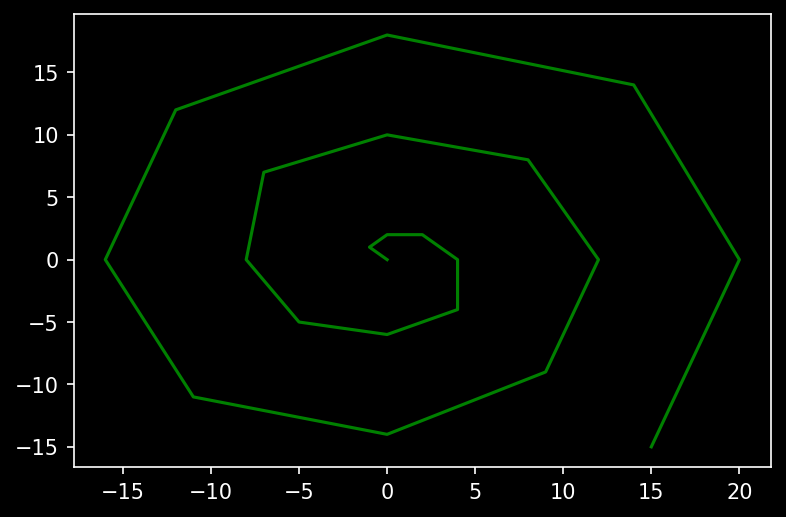

In [98]:
vector_data = """
SPIRA3:
	CSTAT GREEN
	ICVEC
	SCVEC -1,1,CB
	SCVEC 0,2,CB
	SCVEC 2,2,CB
	SCVEC 4,0,CB
	SCVEC 4,-4,CB
	SCVEC 0,-6,CB
	SCVEC -5,-5,CB
	SCVEC -8,0,CB
	SCVEC -7,7,CB
	SCVEC 0,0A,CB
	SCVEC 8,8,CB
	SCVEC 0C,0,CB
	SCVEC 9,-9,CB
	SCVEC 0,-0E,CB
	SCVEC -0B,-0B,CB
	SCVEC -10,0,CB
	SCVEC -0C,0C,CB
	SCVEC 0,12,CB
	SCVEC 0E,0E,CB
	SCVEC 14,0,CB
	SCVEC 0F,-0F,CB
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


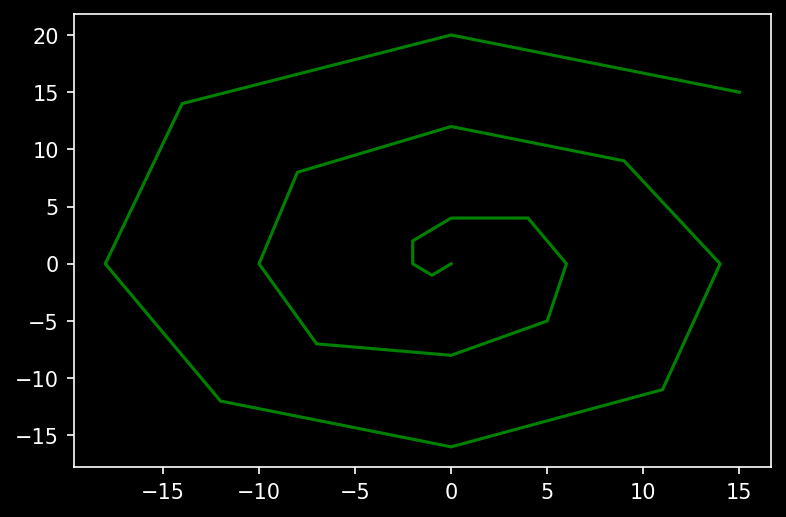

In [99]:
vector_data = """
SPIRA4:
	CSTAT GREEN
	ICVEC
	SCVEC -1,-1,CB
	SCVEC -2,0,CB
	SCVEC -2,2,CB
	SCVEC 0,4,CB
	SCVEC 4,4,CB
	SCVEC 6,0,CB
	SCVEC 5,-5,CB
	SCVEC 0,-8,CB
	SCVEC -7,-7,CB
	SCVEC -0A,0,CB
	SCVEC -8,8,CB
	SCVEC 0,0C,CB
	SCVEC 9,9,CB
	SCVEC 0E,0,CB
	SCVEC 0B,-0B,CB
	SCVEC 0,-10,CB
	SCVEC -0C,-0C,CB
	SCVEC -12,0,CB
	SCVEC -0E,0E,CB
	SCVEC 0,14,CB
	SCVEC 0F,0F,CB
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


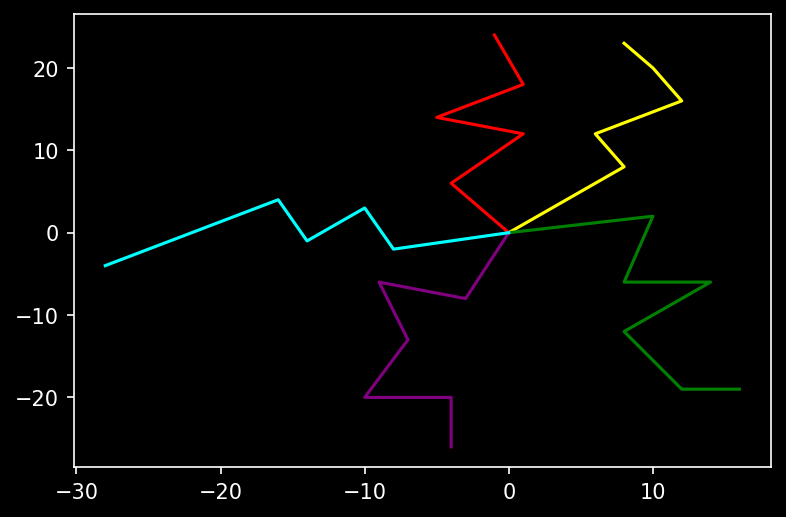

In [100]:
vector_data = """
FUSE0:	
    ICVEC
	CSTAT RED
	SCVEC -4,6,CB
	SCVEC 1,0C,CB
	SCVEC -5,0E,CB
	SCVEC 1,12,CB
	SCVEC -1,18,CB
	CSTAT YELLOW
	SCVEC 8,17,0
	SCVEC 0A,14,CB
	SCVEC 0C,10,CB
	SCVEC 6,0C,CB
	SCVEC 8,8,CB
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 0A,2,CB
	SCVEC 8,-6,CB
	SCVEC 0E,-6,CB
	SCVEC 8,-0C,CB
	SCVEC 0C,-13,CB
	SCVEC 10,-13,CB
	CSTAT PURPLE
	SCVEC -4,-1A,0
	SCVEC -4,-14,CB
	SCVEC -0A,-14,CB
	SCVEC -7,-0D,CB
	SCVEC -9,-6,CB
	SCVEC -3,-8,CB
	SCVEC 0,0,CB
	CSTAT TURQOI
	SCVEC -8,-2,CB
	SCVEC -0A,3,CB
	SCVEC -0E,-1,CB
	SCVEC -10,4,CB
	SCVEC -1C,-4,CB
"""

vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


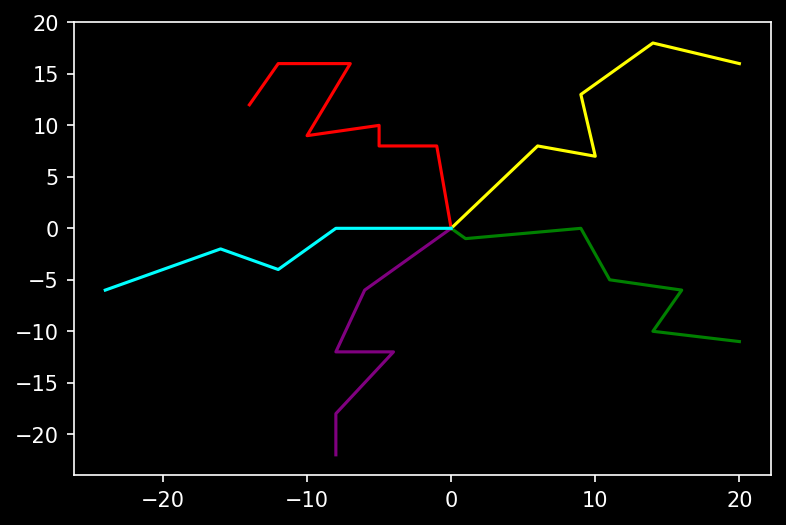

In [101]:
vector_data = """
FUSE1:	
    ICVEC
	CSTAT RED
	SCVEC -1,8,CB
	SCVEC -5,8,CB
	SCVEC -5,0A,CB
	SCVEC -0A,9,CB
	SCVEC -7,10,CB
	SCVEC -0C,10,CB
	SCVEC -0E,0C,CB
	CSTAT YELLOW
	SCVEC 14,10,0
	SCVEC 0E,12,CB
	SCVEC 9,0D,CB
	SCVEC 0A,7,CB
	SCVEC 6,8,CB
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 1,-1,CB
	SCVEC 9,0,CB
	SCVEC 0B,-5,CB
	SCVEC 10,-6,CB
	SCVEC 0E,-0A,CB
	SCVEC 14,-0B,CB
	CSTAT PURPLE
	SCVEC -8,-16,0
	SCVEC -8,-12,CB
	SCVEC -4,-0C,CB
	SCVEC -8,-0C,CB
	SCVEC -6,-6,CB
	SCVEC 0,0,CB
	CSTAT TURQOI
	SCVEC -8,0,CB
	SCVEC -0C,-4,CB
	SCVEC -10,-2,CB
	SCVEC -18,-6,CB
"""

vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


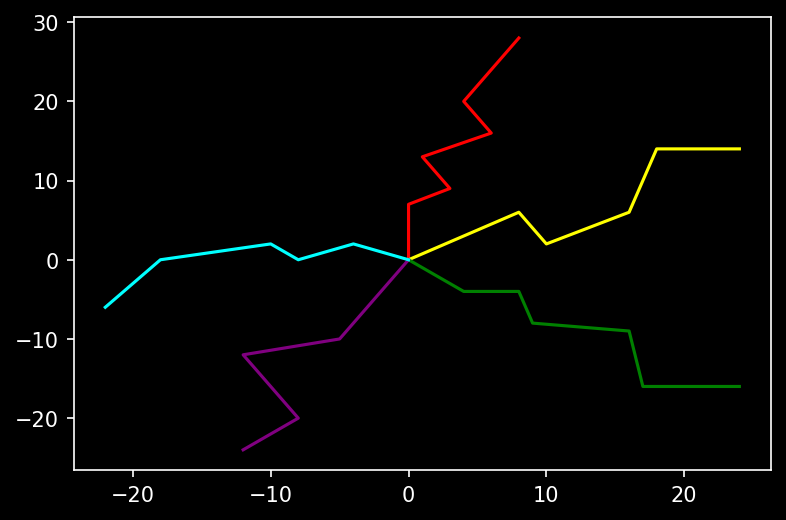

In [102]:
vector_data = """
FUSE2:
	ICVEC
	CSTAT RED
	SCVEC 0,7,CB
	SCVEC 3,9,CB
	SCVEC 1,0D,CB
	SCVEC 6,10,CB
	SCVEC 4,14,CB
	SCVEC 8,1C,CB
	CSTAT YELLOW
	SCVEC 18,0E,0
	SCVEC 12,0E,CB
	SCVEC 10,6,CB
	SCVEC 0A,2,CB
	SCVEC 8,6,CB
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 4,-4,CB
	SCVEC 8,-4,CB
	SCVEC 9,-8,CB
	SCVEC 10,-9,CB
	SCVEC 11,-10,CB
	SCVEC 18,-10,CB
	CSTAT PURPLE
	SCVEC -0C,-18,0
	SCVEC -8,-14,CB
	SCVEC -0C,-0C,CB
	SCVEC -5,-0A,CB
	SCVEC 0,0,CB
	CSTAT TURQOI
	SCVEC -4,2,CB
	SCVEC -8,0,CB
	SCVEC -0A,2,CB
	SCVEC -12,0,CB
	SCVEC -16,-6,CB
"""

vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


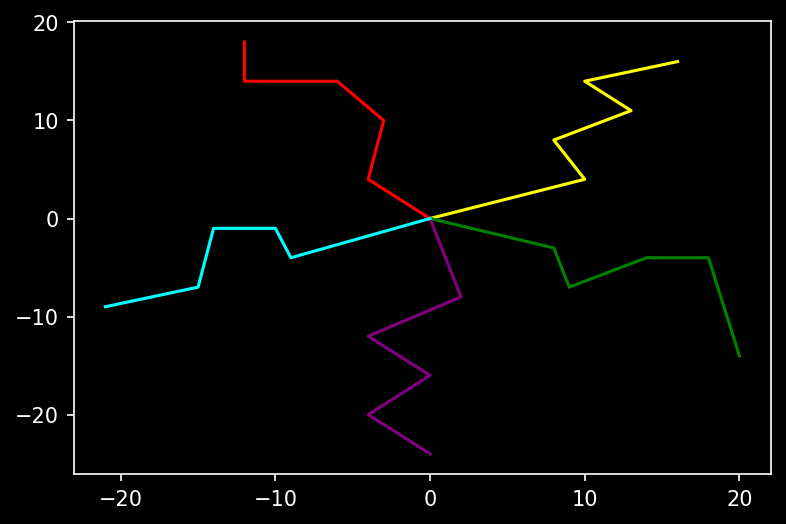

In [103]:
vector_data = """
FUSE3:	
    ICVEC
	CSTAT RED
	SCVEC -4,4,CB
	SCVEC -3,0A,CB
	SCVEC -6,0E,CB
	SCVEC -0C,0E,CB
	SCVEC -0C,12,CB
	CSTAT YELLOW
	SCVEC 10,10,0
	SCVEC 0A,0E,CB
	SCVEC 0D,0B,CB
	SCVEC 8,8,CB
	SCVEC 0A,4,CB
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 8,-3,CB
	SCVEC 9,-7,CB
	SCVEC 0E,-4,CB
	SCVEC 12,-4,CB
	SCVEC 14,-0E,CB
	CSTAT PURPLE
	SCVEC 0,-18,0
	SCVEC -4,-14,CB
	SCVEC 0,-10,CB
	SCVEC -4,-0C,CB
	SCVEC 2,-8,CB
	SCVEC 0,0,CB
	CSTAT TURQOI
	SCVEC -9,-4,CB
	SCVEC -0A,-1,CB
	SCVEC -0E,-1,CB
	SCVEC -0F,-7,CB
	SCVEC -15,-9,CB
"""

vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


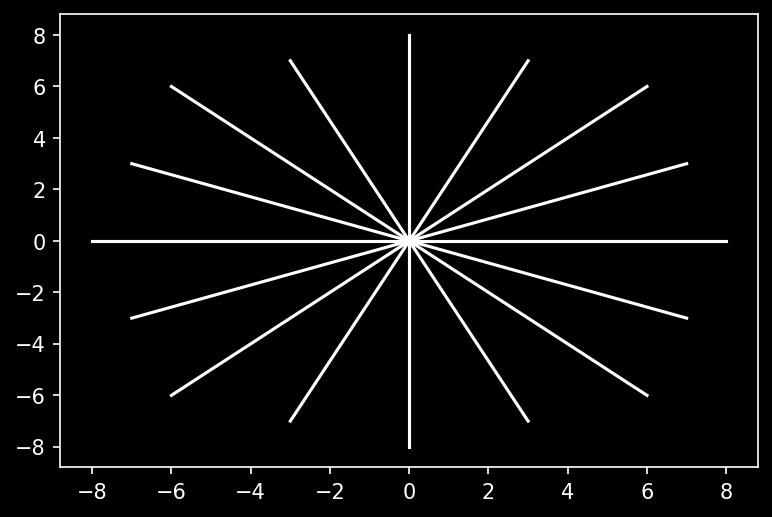

In [104]:
vector_data = """
EXPL1:
	CSTAT WHITE
	ICVEC
	SPOK16			;16 SPOKES 1 SCALE FULL INTENSITY
	.MACRO SPOK16		;INPUT: CM=SCALE MULTIPLIER
				;       CB=INTENSITY
				;       CD=SCALE DIVIDER
	ICVEC
	SCVEC 7,3
	SCVEC -7,-3,CB
	SCVEC -6,-6
	SCVEC 6,6,CB
	SCVEC 3,7
	SCVEC -3,-7,CB
	SCVEC 0,-8
	SCVEC 0,8,CB
	SCVEC -3,7
	SCVEC 3,-7,CB
	SCVEC 6,-6
	SCVEC -6,6,CB
	SCVEC -7,3
	SCVEC 7,-3,CB
	SCVEC 8,0
	SCVEC -8,0,CB
	SCVEC 0,0
"""

vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


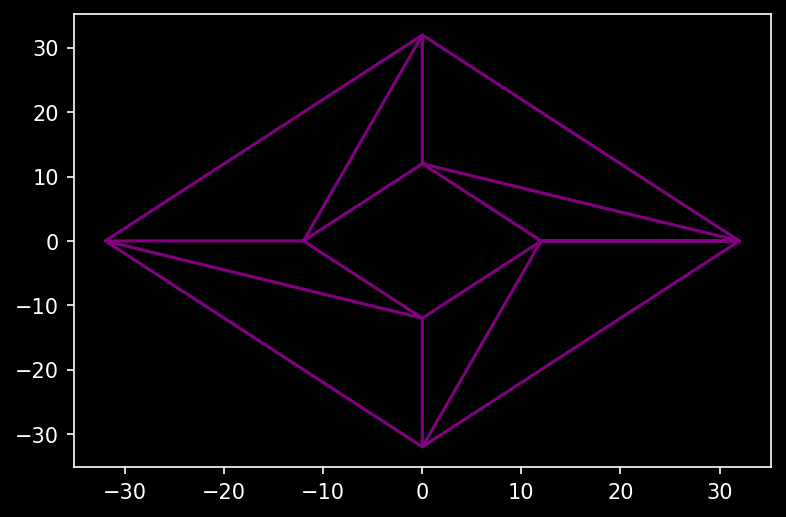

In [105]:

vector_data = """
TANKR:
	ICVEC
    CSTAT PURPLE
	SCVEC 20,0,0
GENTNK:	
	SCVEC 0,20,CB
	SCVEC 0,0C,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	SCVEC 0,0C,CB
	SCVEC -0C,0,CB
	SCVEC 0,20,CB
	SCVEC -20,0,CB
	SCVEC -0C,0,CB
	SCVEC 0,-0C,CB
	SCVEC -20,0,CB
	SCVEC 0,-20,CB
	SCVEC 0,-0C,CB
	SCVEC 0C,0,CB
	SCVEC 0,-20,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


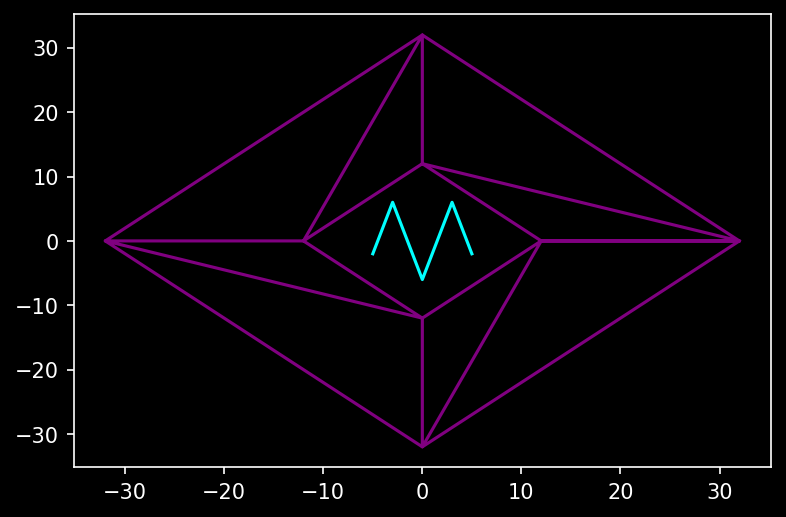

In [106]:
vector_data = """
TANKP:			;TANKER OF PULSARS
	ICVEC
	CSTAT TURQOI
	SCVEC -5,-2,0
	SCVEC -3,6,CB
	SCVEC 0,-6,CB
	SCVEC 3,6,CB
	SCVEC 5,-2,CB
	SCVEC 20,0,0
	JMPL GENTNK
GENTNK:	
    CSTAT PURPLE
	SCVEC 0,20,CB
	SCVEC 0,0C,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	SCVEC 0,0C,CB
	SCVEC -0C,0,CB
	SCVEC 0,20,CB
	SCVEC -20,0,CB
	SCVEC -0C,0,CB
	SCVEC 0,-0C,CB
	SCVEC -20,0,CB
	SCVEC 0,-20,CB
	SCVEC 0,-0C,CB
	SCVEC 0C,0,CB
	SCVEC 0,-20,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)


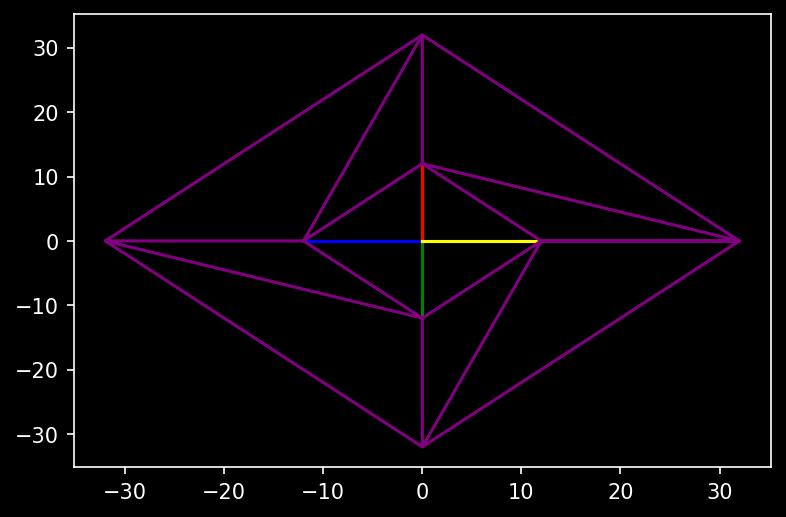

In [107]:
vector_data = """
TANKF:				;TANKER OF FUSES
	ICVEC
	CSTAT BLUE
	SCVEC -0C,0,CB
	SCVEC 0,0C,0
	CSTAT RED
	SCVEC 0,0,CB
	CSTAT GREEN
	SCVEC 0,-0C,CB
	SCVEC 0,0,0
	CSTAT YELLOW
	SCVEC 0C,0,CB
	SCVEC 20,0,0
GENTNK:	
    CSTAT PURPLE
	SCVEC 0,20,CB
	SCVEC 0,0C,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	SCVEC 0,0C,CB
	SCVEC -0C,0,CB
	SCVEC 0,20,CB
	SCVEC -20,0,CB
	SCVEC -0C,0,CB
	SCVEC 0,-0C,CB
	SCVEC -20,0,CB
	SCVEC 0,-20,CB
	SCVEC 0,-0C,CB
	SCVEC 0C,0,CB
	SCVEC 0,-20,CB
	SCVEC 20,0,CB
	SCVEC 0C,0,CB
	RTSL
"""
vectors = parse_vector_commands(vector_data)
vertices = vectors_to_coords(vectors)
plot_vertices(vertices)
